In [6]:
import pandas as pd

df = pd.read_csv('analysis_node_0_to_3.csv')
varients = [i.split('_')[1] for i in df.filename]
cbr_rate = [i.split('_')[2][3:] for i in df.filename]
simulation = [i.split('_')[3][:-3] for i in df.filename]
df['varients'] = varients
df['cbr_rate'] = cbr_rate
df['simulation'] = simulation

duration_m = [12, 11, 10, 11, 10, 9, 8.5, 12, 12, 12, 12]
duration = [ duration_m[int(s[10:])]for s in df.simulation]
df['duration'] = duration
df.throughput /= df.duration
del df['duration']
agg_df = df.groupby(['varients', 'cbr_rate']).agg('mean').reset_index()
agg_df


,varients,cbr_rate,drop_rate,throughput,RTT
0,newreno,1mb,0.003830,7.147407,0.073352
1,newreno,3mb,0.005251,5.841790,0.075410
2,newreno,5mb,0.007711,4.298617,0.075146
3,newreno,7mb,0.012545,2.768625,0.077814
4,newreno,8mb,0.022680,1.849176,0.079870
5,reno,1mb,0.004432,6.144358,0.071646
6,reno,3mb,0.005443,5.660863,0.074854
7,reno,5mb,0.008456,3.931537,0.075034
8,reno,7mb,0.013925,2.420375,0.076199
9,reno,8mb,0.025286,1.558918,0.076821


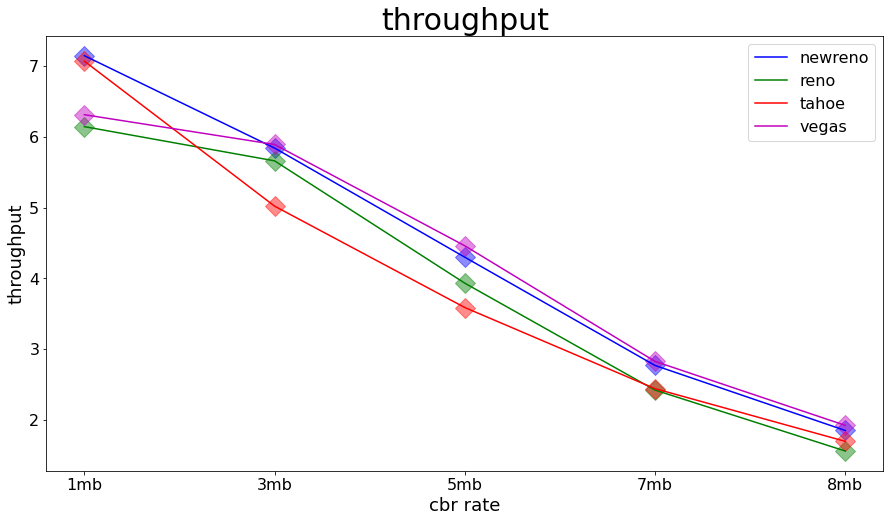

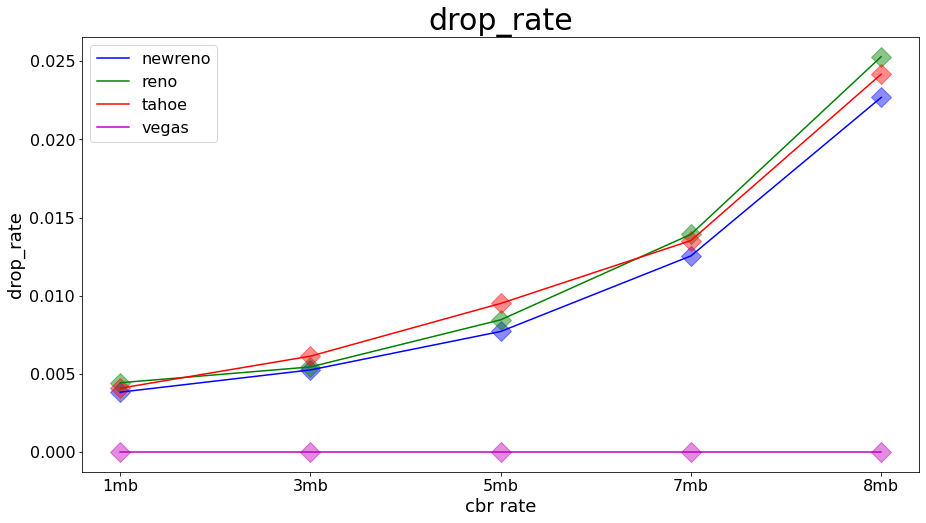

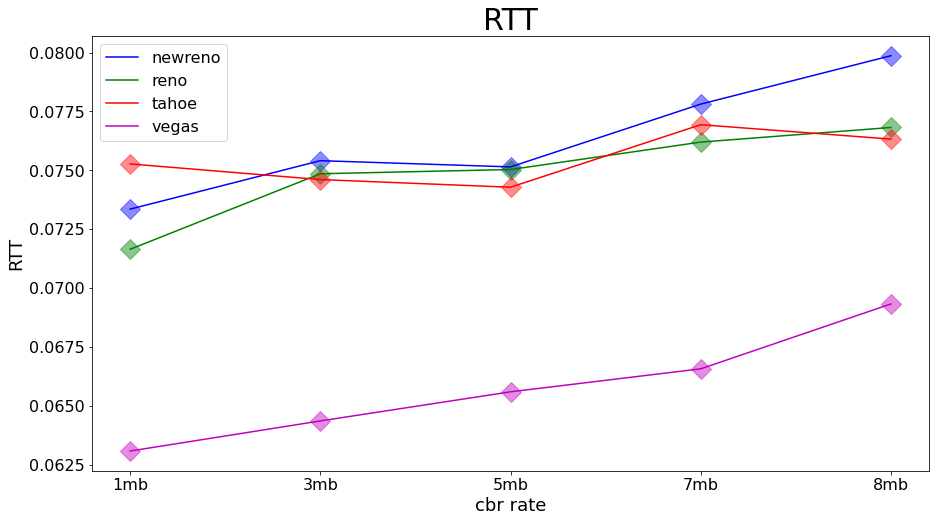

In [8]:
from matplotlib import pyplot as plt


color_m = dict(zip(agg_df.varients.unique(), 'bgrm'))

def plot(df, v, col):
    #plt.boxplot([df[df.cbr_rate == i][col] for i in df.cbr_rate.unique()])
    df = df[df.varients == v]
    plt.scatter(df.cbr_rate, df[col], c=color_m[v], alpha=0.45, s=200, marker='D')
    return plt.plot(df.cbr_rate, df[col], c=color_m[v], label=v)

for col in ['throughput', 'drop_rate', 'RTT']:
    plt.figure(figsize=(15, 8))
    plt.title(col, fontsize=30)
    plt.xlabel('cbr rate', fontsize=18)
    plt.ylabel(col, fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(handles=[
        plot(agg_df, v, col)[0]
        for v in agg_df.varients.unique()
    ], prop={'size': 16})
    plt.show()
    

In [3]:
df['duration']

0      12.0
1      12.0
2      12.0
3      12.0
4      12.0
       ... 
215    12.0
216    12.0
217    12.0
218    12.0
219    12.0
Name: duration, Length: 220, dtype: float64

In [5]:
df.to_csv('')

,filename,drop_rate,throughput,RTT,varients,cbr_rate,simulation,duration
0,ex1_vegas_cbr1mb_simulation0.tr,0.000000,6.416667,0.063076,vegas,1mb,simulation0,12.0
1,ex1_reno_cbr1mb_simulation0.tr,0.003554,6.500000,0.072137,reno,1mb,simulation0,12.0
2,ex1_tahoe_cbr1mb_simulation0.tr,0.003312,7.333333,0.076051,tahoe,1mb,simulation0,12.0
3,ex1_newreno_cbr1mb_simulation0.tr,0.003260,7.250000,0.073126,newreno,1mb,simulation0,12.0
4,ex1_vegas_cbr3mb_simulation0.tr,0.000000,6.000000,0.064586,vegas,3mb,simulation0,12.0
...,...,...,...,...,...,...,...,...
215,ex1_newreno_cbr7mb_simulation10.tr,0.011052,2.833333,0.077044,newreno,7mb,simulation10,12.0
216,ex1_vegas_cbr8mb_simulation10.tr,0.000000,2.083333,0.072823,vegas,8mb,simulation10,12.0
217,ex1_reno_cbr8mb_simulation10.tr,0.019875,1.666667,0.074836,reno,8mb,simulation10,12.0
218,ex1_tahoe_cbr8mb_simulation10.tr,0.020328,1.833333,0.075451,tahoe,8mb,simulation10,12.0
